# Astro 361 Lab 4

## Calculating Read Noise and Gain

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.io import fits
import numpy as np
from scipy.stats import linregress

#Data for TeamNot6, integration time of 100 seconds
bias = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/TeamNot6/"
for i in range(1,10):
    bias.append(fits.getdata(filePath + "QBias0000000{}.fit".format(i) , ext=0).astype(np.int))
bias.append(fits.getdata(filePath + "QBias00000010.fit", ext=0).astype(np.int))

In [55]:
#Importing flats data
flat = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/TeamNot6/"
for i in range(11,21):
    flat.append(fits.getdata(filePath + "QFlatField000000{}.fit".format(i) , ext=0).astype(np.int))

In [56]:
#Take average bias frame to subtract from flat frames
avbias = sum(bias)/10
flat_sub_bias = [flats - avbias for flats in flat]

#Calculate mean and variance of flats data
mean_flat = np.asarray(flat_sub_bias).mean(axis=0)
var_flat  = np.asarray(flat_sub_bias).var(axis=0)

avMeanFlat = sum(mean_flat)/1020
avVarFlat = sum(var_flat)/1020

print(avMeanFlat)
print(avVarFlat)

[  827.18470588   824.01127451   820.18813725 ...,  1702.38127451
  1704.29382353  1703.34970588]
[ 373.83278431  364.56485294  367.91338235 ...,  822.43487255  823.3097549
  854.02053922]


In [71]:
#Gain given average mean and variance
gain = (sum(avMeanFlat)/1530)/(sum(avVarFlat)/1530)
print(gain)

#Read noise in ADU is the mean of flat field data
readNoiseADU = sum(avMeanFlat)/1530
print(readNoiseADU)

2.38175167067
2300.66655165


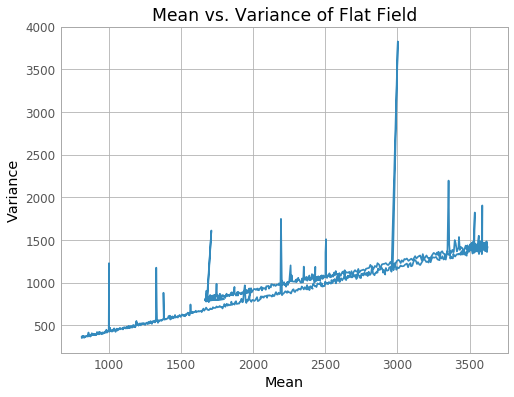

In [58]:
#Making a plot of mean vs. variance to calculate gain
plt.plot(avMeanFlat, avVarFlat)
plt.xlabel("Mean")
plt.ylabel("Variance")
plt.title("Mean vs. Variance of Flat Field")
plt.show()

In [59]:
linregress(avMeanFlat, avVarFlat)
#Gain = 1/slope

LinregressResult(slope=0.37453262206849863, intercept=104.28100265178648, rvalue=0.95648888954771039, pvalue=0.0, stderr=0.0029227173711383145)

In [72]:
#Using gain to calculate read noise in electrons
readNoiseElectrons = readNoiseADU*(1/0.37453262206849863)
print(readNoiseElectrons)

6142.76678742


## Linearity Test

In [86]:
#Data for Team2Awesome, integration time of 90 seconds
biasTeam2 = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Team2Awesome/"
for i in range(1,10):
    biasTeam2.append(fits.getdata(filePath + "ABias0000000{}.fit".format(i) , ext=0).astype(np.int))
biasTeam2.append(fits.getdata(filePath + "ABias00000010.fit", ext=0).astype(np.int))

flatTeam2 = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Team2Awesome/"
for i in range(11,21):
    flatTeam2.append(fits.getdata(filePath + "AFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
avbiasTeam2 = sum(biasTeam2)/10
flat_sub_biasTeam2 = [flatsTeam2 - avbiasTeam2 for flatsTeam2 in flatTeam2]

mean_flatTeam2 = np.asarray(flat_sub_biasTeam2).mean(axis=0)
var_flatTeam2  = np.asarray(flat_sub_biasTeam2).var(axis=0)

avMeanFlatTeam2 = sum(mean_flatTeam2)/1020
avVarFlatTeam2 = sum(var_flatTeam2)/1020

gainTeam2 = (sum(avMeanFlatTeam2)/1530)/(sum(avVarFlatTeam2)/1530)

In [87]:
#Data for Team5, integration time of 60 seconds
biasTeam5 = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Team5/"
for i in range(1,10):
    biasTeam5.append(fits.getdata(filePath + "kBias0000000{}.fit".format(i) , ext=0).astype(np.int))
biasTeam5.append(fits.getdata(filePath + "kBias00000010.fit", ext=0).astype(np.int))

flatTeam5 = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Team5/"
for i in range(11,21):
    flatTeam5.append(fits.getdata(filePath + "kFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
avbiasTeam5 = sum(biasTeam5)/10
flat_sub_biasTeam5 = [flatsTeam5 - avbiasTeam5 for flatsTeam5 in flatTeam5]

mean_flatTeam5 = np.asarray(flat_sub_biasTeam5).mean(axis=0)
var_flatTeam5  = np.asarray(flat_sub_biasTeam5).var(axis=0)

avMeanFlatTeam5 = sum(mean_flatTeam5)/1020
avVarFlatTeam5  = sum(var_flatTeam5)/1020

gainTeam5 = (sum(avMeanFlatTeam5)/1530)/(sum(avVarFlatTeam5)/1530)

In [88]:
#Data for Trogo, integration time of 120 seconds
biasTrogo = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Trogo/"
for i in range(1,10):
    biasTrogo.append(fits.getdata(filePath + "TBias0000000{}.fit".format(i) , ext=0).astype(np.int))
biasTrogo.append(fits.getdata(filePath + "TBias00000010.fit", ext=0).astype(np.int))

flatTrogo = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Trogo/"
for i in range(11,21):
    flatTrogo.append(fits.getdata(filePath + "TFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
avbiasTrogo = sum(biasTrogo)/10
flat_sub_biasTrogo = [flatsTrogo - avbiasTrogo for flatsTrogo in flatTrogo]

mean_flatTrogo = np.asarray(flat_sub_biasTrogo).mean(axis=0)
var_flatTrogo  = np.asarray(flat_sub_biasTrogo).var(axis=0)

avMeanFlatTrogo = sum(mean_flatTrogo)/1020
avVarFlatTrogo  = sum(var_flatTrogo)/1020

gainTrogo = (sum(avMeanFlatTrogo)/1530)/(sum(avVarFlatTrogo)/1530)

In [89]:
#Data for Group4, integration time of 150 seconds
biasGroup4 = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Group4/"
for i in range(1,10):
    biasGroup4.append(fits.getdata(filePath + "aBias0000000{}.fit".format(i) , ext=0).astype(np.int))
biasGroup4.append(fits.getdata(filePath + "aBias00000010.fit", ext=0).astype(np.int))

flatGroup4 = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Group4/"
for i in range(11,21):
    flatGroup4.append(fits.getdata(filePath + "aFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
avbiasGroup4 = sum(biasGroup4)/10
flat_sub_biasGroup4 = [flatsGroup4 - avbiasGroup4 for flatsGroup4 in flatGroup4]

mean_flatGroup4 = np.asarray(flat_sub_biasGroup4).mean(axis=0)
var_flatGroup4  = np.asarray(flat_sub_biasGroup4).var(axis=0)

avMeanFlatGroup4 = sum(mean_flatGroup4)/1020
avVarFlatGroup4  = sum(var_flatGroup4)/1020

gainGroup4 = (sum(avMeanFlatGroup4)/1530)/(sum(avVarFlatGroup4)/1530)

In [90]:
#Data for Sharknado, integration time of 75 seconds
biasSharknado = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Sharknado/"
for i in range(1,10):
    biasSharknado.append(fits.getdata(filePath + "SBias0000000{}.fit".format(i) , ext=0).astype(np.int))
biasSharknado.append(fits.getdata(filePath + "SBias00000010.fit", ext=0).astype(np.int))

flatSharknado = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/Sharknado/"
for i in range(11,21):
    flatSharknado.append(fits.getdata(filePath + "SFlatField000000{}.fit".format(i) , ext=0).astype(np.int))
    
avbiasSharknado = sum(biasSharknado)/10
flat_sub_biasSharknado = [flatsSharknado - avbiasSharknado for flatsSharknado in flatSharknado]

mean_flatSharknado = np.asarray(flat_sub_biasSharknado).mean(axis=0)
var_flatSharknado  = np.asarray(flat_sub_biasSharknado).var(axis=0)

avMeanFlatSharknado = sum(mean_flatSharknado)/1020
avVarFlatSharknado  = sum(var_flatSharknado)/1020

gainSharknado = (sum(avMeanFlatSharknado)/1530)/(sum(avVarFlatSharknado)/1530)

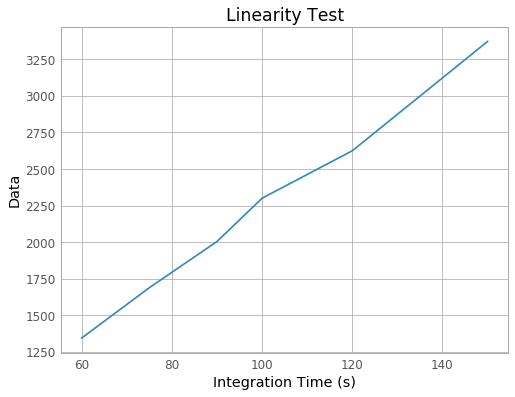

In [110]:
#Plotting each team's data with the corresponding integration time
meanArray = [sum(avMeanFlatTeam5)/1530, sum(avMeanFlatSharknado)/1530, sum(avMeanFlatTeam2)/1530, sum(avMeanFlat)/1530, sum(avMeanFlatTrogo)/1530, sum(avMeanFlatGroup4)/1530]
integrationTimes = [60, 75, 90, 100, 120, 150]
plt.plot(integrationTimes, meanArray)
plt.title("Linearity Test")
plt.xlabel("Integration Time (s)")
plt.ylabel("Data")
plt.show()

## Fitting Dark Current

In [111]:
#Importing bias frames at each temperature
biasDark = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/TeamNot6/"
biasDark.append(fits.getdata(filePath + "QBias00000021.fit", ext=0).astype(np.int)) #-6.1 C
biasDark.append(fits.getdata(filePath + "QBias00000022.fit", ext=0).astype(np.int)) #-6.1 C
biasDark.append(fits.getdata(filePath + "QBias00000025.fit", ext=0).astype(np.int)) #-2 C
biasDark.append(fits.getdata(filePath + "QBias00000026.fit", ext=0).astype(np.int)) #-2 C
biasDark.append(fits.getdata(filePath + "QBias00000029.fit", ext=0).astype(np.int)) #1.9 C
biasDark.append(fits.getdata(filePath + "QBias00000030.fit", ext=0).astype(np.int)) #1.9 C
biasDark.append(fits.getdata(filePath + "QBias00000031.fit", ext=0).astype(np.int)) #6.2 C
biasDark.append(fits.getdata(filePath + "QBias00000036.fit", ext=0).astype(np.int)) #6.2 C
biasDark.append(fits.getdata(filePath + "QBias00000037.fit", ext=0).astype(np.int)) #10.2 C
biasDark.append(fits.getdata(filePath + "QBias00000040.fit", ext=0).astype(np.int)) #10.2 C

In [112]:
#Importing dark frames at each temperature
dark = []
filePath = "/Users/jackmoore/Documents/Astro 361/lab4/ccd_lab4/TeamNot6/"
dark.append(fits.getdata(filePath + "QDark00000023.fit", ext=0).astype(np.int)) #-6.1 C
dark.append(fits.getdata(filePath + "QDark00000024.fit", ext=0).astype(np.int)) #-6.1 C
dark.append(fits.getdata(filePath + "QDark00000027.fit", ext=0).astype(np.int)) #-2 C
dark.append(fits.getdata(filePath + "QDark00000028.fit", ext=0).astype(np.int)) #-2 C
dark.append(fits.getdata(filePath + "QDark00000032.fit", ext=0).astype(np.int)) #1.9 C
dark.append(fits.getdata(filePath + "QDark00000033.fit", ext=0).astype(np.int)) #1.9 C 
dark.append(fits.getdata(filePath + "QDark00000038.fit", ext=0).astype(np.int)) #6.2 C
dark.append(fits.getdata(filePath + "QDark00000039.fit", ext=0).astype(np.int)) #6.2 C
dark.append(fits.getdata(filePath + "QDark00000042.fit", ext=0).astype(np.int)) #10.2 C
dark.append(fits.getdata(filePath + "QDark00000043.fit", ext=0).astype(np.int)) #10.2 C

In [118]:
#Subtracting each dark frame by its corresponding bias frame
dark_sub_bias_0 = dark[0] - bias[0]
dark_sub_bias_1 = dark[1] - bias[1]
dark_sub_bias_2 = dark[2] - bias[2]
dark_sub_bias_3 = dark[3] - bias[3]
dark_sub_bias_4 = dark[4] - bias[4]
dark_sub_bias_5 = dark[5] - bias[5]
dark_sub_bias_6 = dark[6] - bias[6]
dark_sub_bias_7 = dark[7] - bias[7]
dark_sub_bias_8 = dark[8] - bias[8]
dark_sub_bias_9 = dark[9] - bias[9]

In [122]:
#Calculating the mean of each new dark frame
mean_dark_0 = np.asarray(dark_sub_bias_0).mean(axis=0)
mean_dark_1 = np.asarray(dark_sub_bias_1).mean(axis=0)
mean_dark_2 = np.asarray(dark_sub_bias_2).mean(axis=0)
mean_dark_3 = np.asarray(dark_sub_bias_3).mean(axis=0)
mean_dark_4 = np.asarray(dark_sub_bias_4).mean(axis=0)
mean_dark_5 = np.asarray(dark_sub_bias_5).mean(axis=0)
mean_dark_6 = np.asarray(dark_sub_bias_6).mean(axis=0)
mean_dark_7 = np.asarray(dark_sub_bias_7).mean(axis=0)
mean_dark_8 = np.asarray(dark_sub_bias_8).mean(axis=0)
mean_dark_9 = np.asarray(dark_sub_bias_9).mean(axis=0)

In [123]:
#Calculating the mean of each dark frame array
avMeanDark0 = sum(mean_dark_0)/1530
avMeanDark1 = sum(mean_dark_1)/1530
avMeanDark2 = sum(mean_dark_2)/1530
avMeanDark3 = sum(mean_dark_3)/1530
avMeanDark4 = sum(mean_dark_4)/1530
avMeanDark5 = sum(mean_dark_5)/1530
avMeanDark6 = sum(mean_dark_6)/1530
avMeanDark7 = sum(mean_dark_7)/1530
avMeanDark8 = sum(mean_dark_8)/1530
avMeanDark9 = sum(mean_dark_9)/1530

In [126]:
#Creating usable arrays for each frame and their corresponding temperature
darkArray = [avMeanDark0, avMeanDark1, avMeanDark2, avMeanDark3, avMeanDark4, avMeanDark5, avMeanDark6, avMeanDark7, avMeanDark8, avMeanDark9]
tempArray = [-6.1, -6.1, -2, -2, 1.9, 1.9, 6.2, 6.2, 10.2, 10.2]

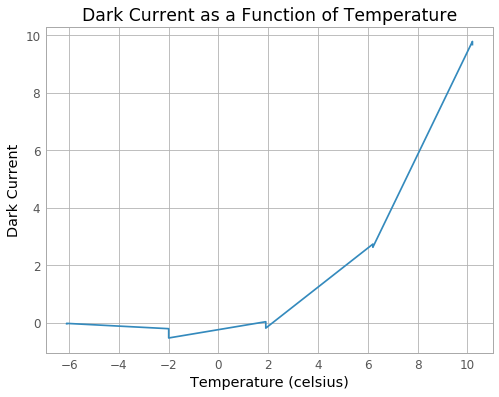

In [127]:
#Plotting dark current as a function of temperature
plt.plot(tempArray, darkArray)
plt.xlabel("Temperature (celsius)")
plt.ylabel("Dark Current")
plt.title("Dark Current as a Function of Temperature")
plt.show()

In [134]:
#Defining parameters
A,Eg = (100, 1.12)
k = 8.617330350e-5 #Boltzmann constant

In [135]:
#Defining function to calculate dark current
def func(T, A, Eg):
    return A*(T**(3/2))*np.exp((-1*Eg)/(2*k*T))

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


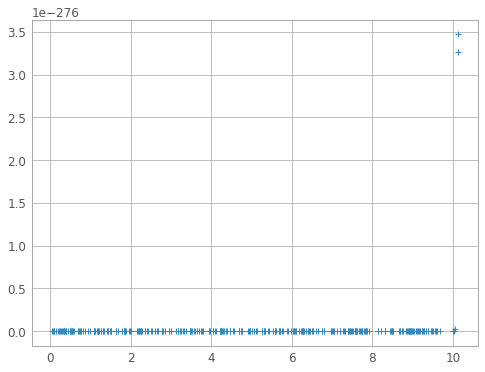

In [137]:
#Initial setup for curve fitting
Tmin,Tmax = (-6.1,10.2)
N = 500
Tvals = np.random.uniform(Tmin, Tmax, N)
Dvals0 = func(Tvals, A, Eg)
plt.plot(Tvals, Dvals0, '+')
plt.show()

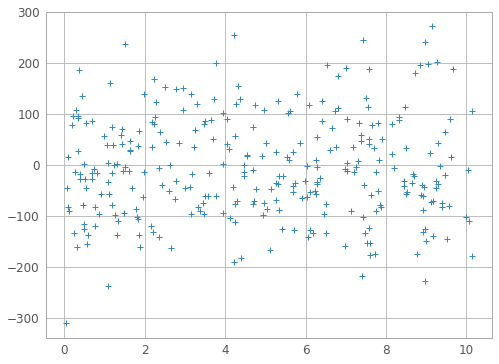

In [149]:
#Adding error
sig = 100.0
err = sig * np.random.standard_normal(N)
Dvals = Dvals0 + err
plt.plot(Tvals, Dvals, '+')
plt.show()

In [150]:
# import the curve fitting module and standard imports
from scipy.optimize import curve_fit 

#Fitted Function 
def func1 (T, A, Eg):
    return A*(T**(3/2))*np.exp((-1*Eg)/(2*k*T))

#Initial estimates for the parameters
A0,Eg0 = (0.5,0.5)

A=10, Eg=1.12


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


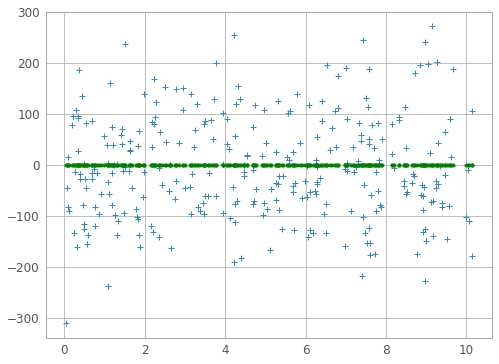

In [151]:
# manually fit the curve to obtain a viable set of starting parameters
At,Egt = (10,1.12)
plt.plot(Tvals, Dvals, '+')
plt.plot(Tvals,func1(Tvals,At,Egt), 'g.')
plt.xlabel("Temperature (celsius)")
plt.ylabel("Dark ")
print ("A=%s, Eg=%s" % (At,Egt))